In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/diabetes2.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Handling missing values (if any)
data = data.dropna()

# Assuming the last column is the target variable
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## regression

Epoch 10/100, Loss: 0.47811073064804077
Epoch 20/100, Loss: 0.3406374752521515
Epoch 30/100, Loss: 0.25966113805770874
Epoch 40/100, Loss: 0.21169929206371307
Epoch 50/100, Loss: 0.1836385279893875
Epoch 60/100, Loss: 0.168874591588974
Epoch 70/100, Loss: 0.16193775832653046
Epoch 80/100, Loss: 0.15889640152454376
Epoch 90/100, Loss: 0.15779955685138702
Epoch 100/100, Loss: 0.15750133991241455
Train MSE: 0.15749007620059088, Train R2: 0.3048701161729719
Test MSE: 0.170939702374074, Test R2: 0.25546262965958866
Test accuracy: 0.7597402597402597


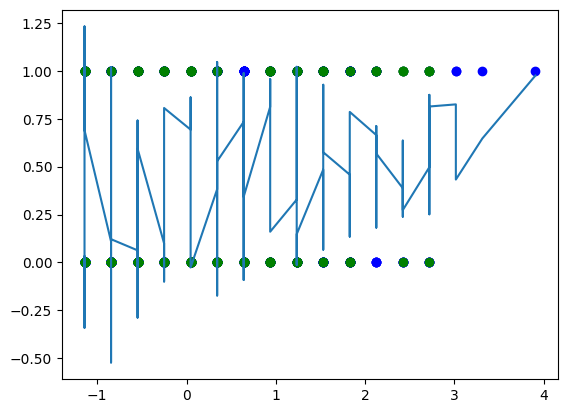

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np



# Convert data to PyTorch tensors
#Data Type and Shape: Ensures compatibility with PyTorch’s operations and loss functions.
#Conversion to Tensors: Prepares your data for use with PyTorch.
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Define the regression model
class SimpleRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(SimpleRegressionModel, self).__init__()
        # Define a single linear layer
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        # Forward pass through the linear layer
        return self.linear(x)

# Initialize the model
input_dim = X_train.shape[1]  # Number of features
model = SimpleRegressionModel(input_dim)

# Define loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error loss
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Adam optimizer

# Training loop
epochs = 100
for epoch in range(epochs):
    optimizer.zero_grad()  # Zero the gradients
    outputs = model(X_train_tensor)  # Forward pass
    loss = criterion(outputs, y_train_tensor)  # Compute loss
    loss.backward()  # Backward pass compute gradients
    optimizer.step()  # Update weights

    # Print loss every 10 epochs
    if (epoch+1) % 10 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')

# Make predictions
y_train_pred = model(X_train_tensor).detach().numpy()
y_test_pred = model(X_test_tensor).detach().numpy()

# Round predictions to nearest integer (0 or 1)
y_pred_rounded = np.round(y_test_pred)  # Assuming you want to treat

# Calculate and print performance metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_pred_rounded) # Calculate accuracy before printing
print(f'Train MSE: {train_mse}, Train R2: {train_r2}')
print(f'Test MSE: {test_mse}, Test R2: {test_r2}')
# Calculate accuracy
print(f"Test accuracy: {accuracy}")
# Visualize the model for a single feature
plt.scatter(X_train[:, feature_idx], y_train, color='blue', label='Training data')
plt.scatter(X_test[:, feature_idx], y_test, color='green', label='Test data')

# Sort values for plotting the regression line
sorted_indices = np.argsort(X_train[:, feature_idx])
plt.plot(X_train[:, feature_idx][sorted_indices],
         model(X_train_tensor).detach().numpy()[np.argsort(X_train[:, feature_idx])])

## classification

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)  # Linear layer

    def forward(self, x):
        return torch.sigmoid(self.linear(x))  # Sigmoid activation for logistic regression
input_dim = X_train.shape[1]  # Number of features
model = LogisticRegressionModel(input_dim)

criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Adam Optimizer

epochs = 100
for epoch in range(epochs):
    optimizer.zero_grad()  # Zero the gradients
    outputs = model(X_train_tensor)  # Forward pass
    loss = criterion(outputs, y_train_tensor)  # Compute loss
    loss.backward()  # Backward pass
    optimizer.step()  # Update weights

    if (epoch+1) % 10 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)
    predictions_class = (predictions >= 0.5).float()  # Convert probabilities to binary predictions

# Convert predictions to numpy array for evaluation
predictions_class_np = predictions_class.numpy()

# Calculate and print the classification report
report = classification_report(y_test, predictions_class_np)
print("Classification Report:")
print(report)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions_class_np)
print(f"Accuracy: {accuracy}")



Epoch 10/100, Loss: 0.6660562753677368
Epoch 20/100, Loss: 0.5987176299095154
Epoch 30/100, Loss: 0.554681658744812
Epoch 40/100, Loss: 0.5259227156639099
Epoch 50/100, Loss: 0.507088840007782
Epoch 60/100, Loss: 0.49474844336509705
Epoch 70/100, Loss: 0.48672524094581604
Epoch 80/100, Loss: 0.481434166431427
Epoch 90/100, Loss: 0.4778486490249634
Epoch 100/100, Loss: 0.4753412902355194
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        99
           1       0.65      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

Accuracy: 0.7532467532467533


Epoch 10/100, Loss: 0.4579024314880371
Epoch 20/100, Loss: 0.19819815456867218
Epoch 30/100, Loss: 0.4806654453277588
Epoch 40/100, Loss: 0.5385015606880188
Epoch 50/100, Loss: 0.25498566031455994
Epoch 60/100, Loss: 0.18584269285202026
Epoch 70/100, Loss: 0.5542088150978088
Epoch 80/100, Loss: 0.4789653718471527
Epoch 90/100, Loss: 0.47026097774505615
Epoch 100/100, Loss: 0.39852723479270935
Accuracy: 0.7467532467532467


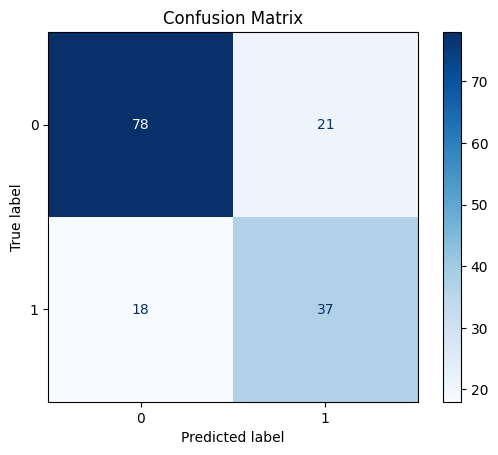

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
import matplotlib.pyplot as plt

# Convert target variables to tensors of integers
y_train_class = torch.tensor(y_train, dtype=torch.long)
y_test_class = torch.tensor(y_test, dtype=torch.long)

# Create DataLoader for the training set
train_dataset_class = TensorDataset(X_train_tensor, y_train_class)
train_loader_class = DataLoader(train_dataset_class, batch_size=32, shuffle=True)

# Define the classification model
class ClassificationModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(ClassificationModel, self).__init__()
        # Define a single fully connected layer
        self.fc = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.fc(x)

# Number of classes in the target variable
output_dim = len(set(y_train))
model_class = ClassificationModel(input_dim, output_dim)

# Define loss function and optimizer for classification
criterion_class = nn.CrossEntropyLoss()  # Cross-Entropy loss for classification
optimizer_class = optim.Adam(model_class.parameters(), lr=0.01)  # Adam optimizer

# Training loop
epochs = 100
for epoch in range(epochs):
    for inputs, targets in train_loader_class:
        optimizer_class.zero_grad()  # Zero the gradients
        outputs = model_class(inputs)  # Forward pass
        loss = criterion_class(outputs, targets)  # Compute loss
        loss.backward()  # Backward pass (compute gradients)
        optimizer_class.step()  # Update weights

    # Print loss every 10 epochs
    if (epoch+1) % 10 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')

# Evaluate the model
model_class.eval()
with torch.no_grad():
    # Make predictions on the test set
    predictions_class = torch.argmax(model_class(X_test_tensor), dim=1)

# Convert predictions to numpy array
predictions_class_np = predictions_class.numpy()

# Calculate and print the classification report

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions_class_np)
print(f"Accuracy: {accuracy}")

# Plot the confusion matrix
cm = confusion_matrix(y_test, predictions_class_np)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [ ]:
report = classification_report(y_test, predictions_class_np)
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)


Accuracy: 0.7467532467532467
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster Labels: [2 1 2 1 0 1 1 1 0 2 1 2 2 0 2 1 0 1 1 0 0 2 2 2 2 2 2 1 2 2 2 0 1 1 2 0 2
 2 1 0 0 2 2 2 2 0 1 1 2 1 1 1 1 2 0 1 0 0 0 0 1 2 1 0 2 1 0 2 1 0 1 0 2 0
 1 1 2 1 1 1 1 1 2 1 2 0 2 1 2 1 1 0 2 2 1 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 0
 0 1 1 0 2 2 1 1 1 0 1 1 2 1 0 0 1 0 2 0 2 0 2 1 1 1 1 1 0 2 2 1 2 0 1 2 0
 2 1 0 1 2 0 2 0 1 1 1 2 2 2 0 1 1 2 1 1 1 1 2 0 1 0 1 0 2 0 2 2 1 1 1 1 2
 2 0 0 0 0 1 2 2 2 2 0 1 1 0 0 1 1 1 1 2 1 2 2 1 2 1 0 2 0 2 0 0 0 1 2 0 2
 1 2 1 1 1 0 0 0 1 0 1 1 1 2 2 0 2 1 1 1 1 0 0 2 2 0 0 1 2 1 1 1 2 1 1 1 0
 2 0 1 1 2 1 2 1 0 1 1 2 1 1 1 2 0 1 1 2 1 1 2 2 2 2 2 0 0 1 0 1 0 0 0 2 0
 0 0 2 2 1 0 1 2 1 0 2 1 0 0 1 0 1 1 2 1 1 1 0 2 1 1 1 2 1 1 0 2 0 2 2 1 1
 2 1 0 1 2 0 2 1 1 1 2 2 2 1 1 1 1 1 1 1 1 1 2 0 2 2 0 0 2 2 2 0 1 1 1 1 0
 0 1 1 1 0 2 1 1 2 0 1 1 1 1 1 1 2 2 2 1 0 2 0 1 2 0 1 1 1 0 1 2 0 2 2 0 2
 1 2 0 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0 1 0 0 0 1 1 1 1 1 1 2 1 1 2 0 1 1 2
 1 0 1 0 1 1 1 1 0 2 1 2 2 1 0 2 2 1 2 1 2 1 1 0 1 0 0 1 1 2 1 2 0 1 2 2 0
 0 1 1 1 

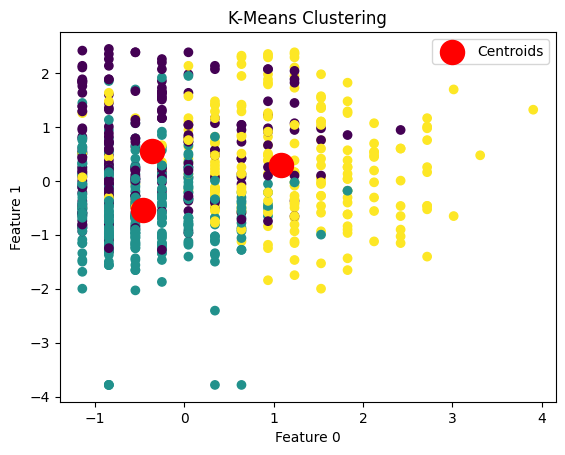

In [ ]:
from sklearn.cluster import KMeans

# Perform k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Predict cluster labels
cluster_labels = kmeans.predict(X_scaled)

print(f"Cluster Labels: {cluster_labels}")
# Choose the indices of the features you want to plot
feature_idx1 = 0  # For example, the first feature
feature_idx2 = 1  # For example, the second feature

plt.scatter(X_scaled[:, feature_idx1], X_scaled[:, feature_idx2], c=cluster_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, feature_idx1], kmeans.cluster_centers_[:, feature_idx2], s=300, c='red', label='Centroids')
plt.xlabel(f'Feature {feature_idx1}')
plt.ylabel(f'Feature {feature_idx2}')
plt.title('K-Means Clustering')
plt.legend()
plt.show()
